<a href="https://colab.research.google.com/github/hammad5148/Tasks/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1009]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [1010]:
df=pd.read_csv('/content/placement.csv')

In [1011]:
df.shape

(100, 4)

In [1012]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [1013]:
df.dropna(inplace=True)

In [1014]:
df.isnull().sum()

,0
Unnamed: 0,0
cgpa,0
iq,0
placement,0


In [1015]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


<Axes: xlabel='cgpa', ylabel='placement'>

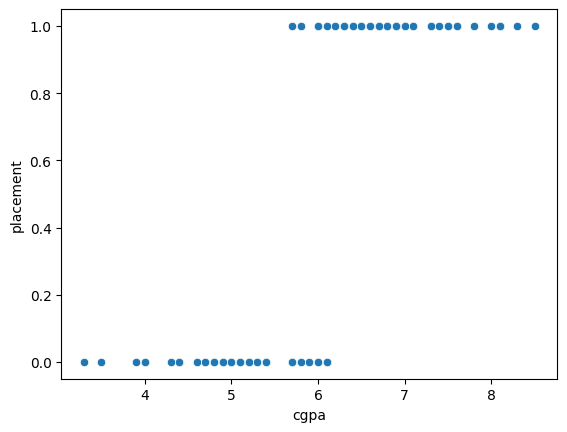

In [1016]:
sns.scatterplot(data=df,y='placement',x='cgpa')

<Axes: xlabel='iq', ylabel='placement'>

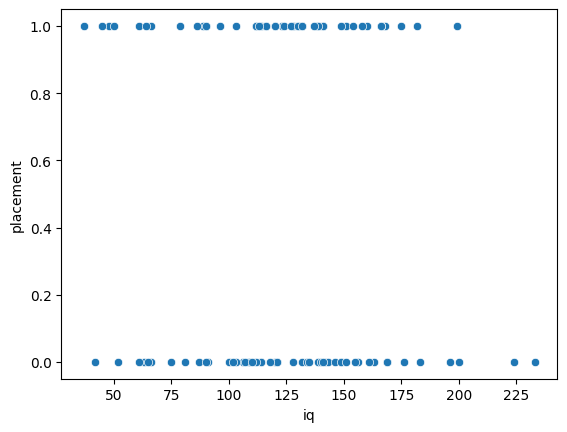

In [1017]:
sns.scatterplot(data=df,y='placement',x='iq')

<Axes: xlabel='cgpa', ylabel='iq'>

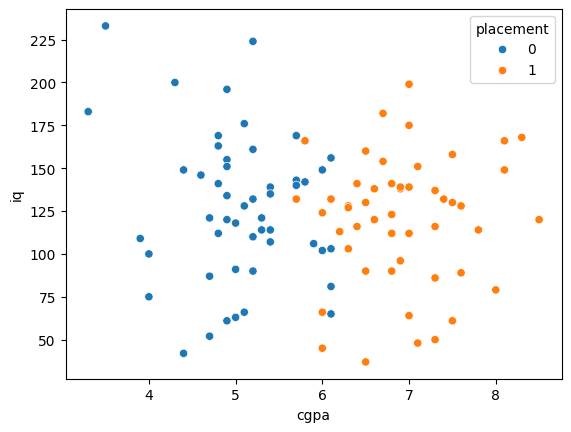

In [1018]:
sns.scatterplot(x=df['cgpa'],y=df['iq'],hue=df['placement'])

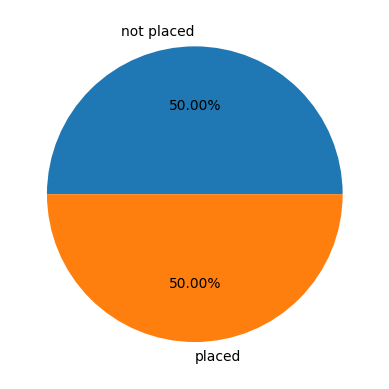

In [1019]:
plt.pie(df['placement'].value_counts(),labels=['not placed','placed'],autopct='%0.2f%%')
plt.show()

In [1020]:
df=df.iloc[:,1:]

In [1021]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [1022]:
df['cgpa/iq']=df['cgpa']/df['iq']

In [1023]:
df.drop(['cgpa','iq'],axis=1,inplace=True)

In [1024]:
df.head()

,placement,cgpa/iq
0,1,0.055285
1,0,0.055660
2,0,0.043802
3,1,0.056061
4,0,0.040845


<Axes: xlabel='cgpa/iq', ylabel='placement'>

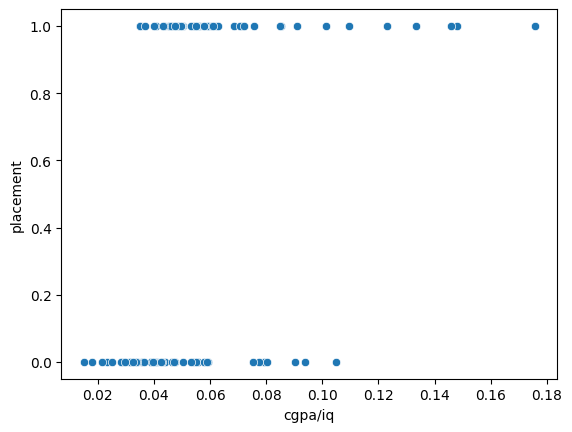

In [1025]:
sns.scatterplot(data=df,y='placement',x='cgpa/iq')

<Axes: xlabel='placement', ylabel='cgpa/iq'>

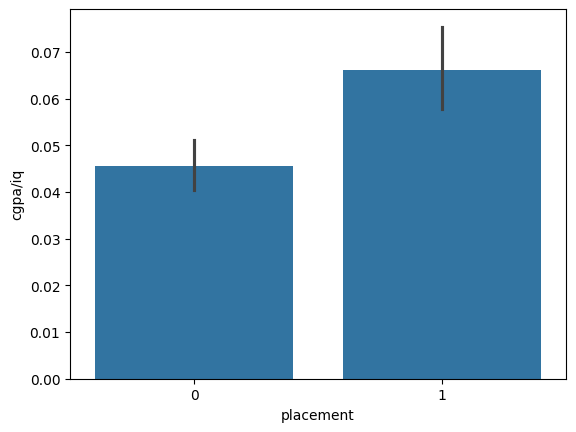

In [1026]:
sns.barplot(data=df,x='placement',y='cgpa/iq')

In [1027]:
X=df.iloc[:,1]
y=df.iloc[:,0]

In [1028]:
X

,cgpa/iq
0,0.055285
1,0.055660
2,0.043802
3,0.056061
4,0.040845
...,...
95,0.021500
96,0.104762
97,0.036813
98,0.061165


In [1029]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [1030]:
from sklearn.model_selection import train_test_split

In [1031]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [1032]:
X_train=X_train.values.reshape(-1, 1)

In [1033]:
X_test=X_test.values.reshape(-1, 1)

In [1034]:
from sklearn.preprocessing import StandardScaler

In [1035]:
scaler=StandardScaler()

In [1036]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [1037]:
from sklearn.linear_model import LinearRegression

In [1038]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [1039]:
y_predict=model.predict(X_test).round(0).astype(int)

In [1040]:
y_predict

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0])

In [1041]:
y_test

,placement
83,1
53,1
70,1
45,1
44,1
39,0
22,0
80,0
10,1
0,1


In [1042]:
from sklearn.metrics import mean_squared_error

In [1043]:
test_mse = mean_squared_error(y_test, y_predict)

print(f"Test MSE: {test_mse:.4f}")


Test MSE: 0.4000


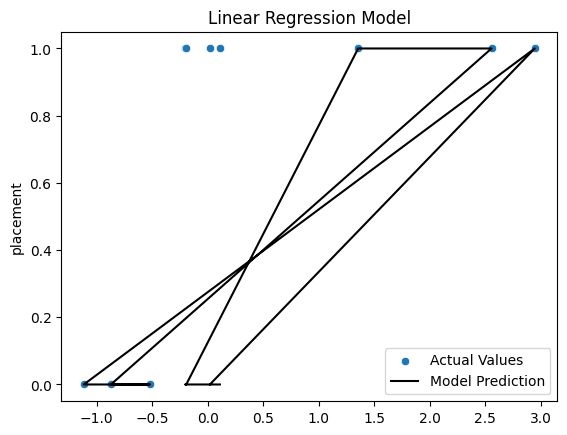

In [1044]:
sns.scatterplot(x=X_test.flatten(),y=y_test,palette='Reds',label='Actual Values')
plt.plot(X_test,y_predict,color='k',label='Model Prediction')
plt.title('Linear Regression Model')
plt.legend()
plt.show()

Data Augmentation

<Axes: xlabel='placement', ylabel='cgpa/iq'>

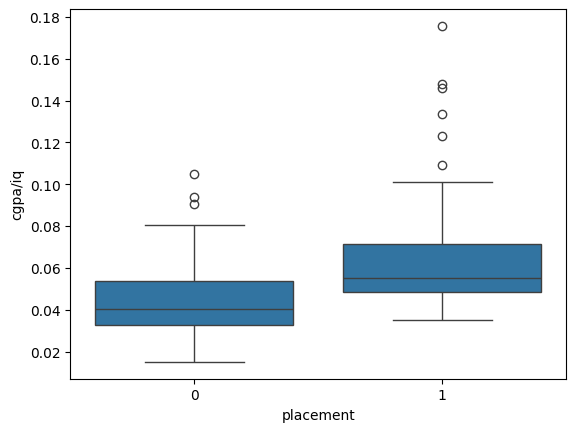

In [1045]:
sns.boxplot(x=df['placement'],y=df['cgpa/iq'])

In [1046]:
def remove_outliers_iqr(df, column, threshold):

    Q1 = df['cgpa/iq'].quantile(0.25)
    Q3 = df['cgpa/iq'].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    return df[(df['cgpa/iq'] >= lower_bound) & (df['cgpa/iq'] <= upper_bound)]

In [1047]:
df=remove_outliers_iqr(df,'price',.36)

<Axes: xlabel='placement', ylabel='cgpa/iq'>

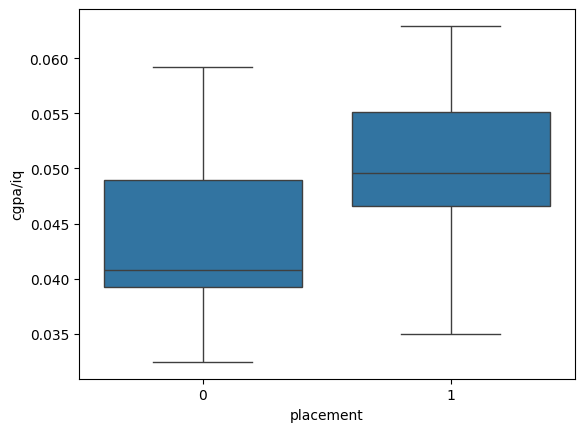

In [1048]:
sns.boxplot(x=df['placement'],y=df['cgpa/iq'])

In [1049]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,test_size=0.1,random_state=42)

In [1050]:
X_train1=X_train1.values.reshape(-1, 1)

In [1051]:
X_test1=X_test1.values.reshape(-1, 1)

In [1052]:
X_train1=scaler.fit_transform(X_train1)
X_test1=scaler.transform(X_test1)

In [1053]:
model=LinearRegression()
model.fit(X_train1,y_train1)

LinearRegression()

In [1054]:
y_predict1=model.predict(X_test1).round(0).astype(int)

In [1055]:
y_predict1

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0])

In [1056]:
test_mse = mean_squared_error(y_test1, y_predict1)

print(f"Test MSE: {test_mse:.4f}")

Test MSE: 0.4000


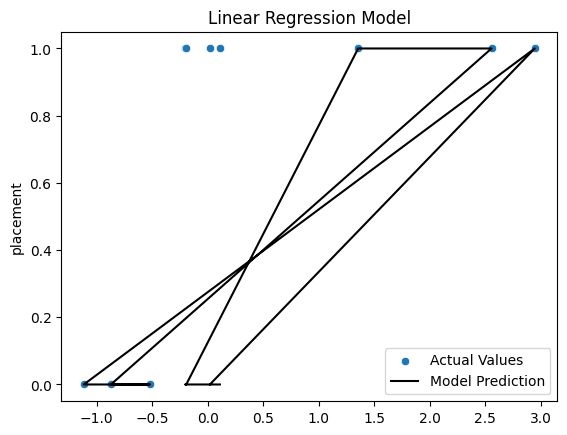

In [1057]:
sns.scatterplot(x=X_test1.flatten(),y=y_test1,palette='Reds',label='Actual Values')
plt.plot(X_test1,y_predict1,color='k',label='Model Prediction')
plt.title('Linear Regression Model')
plt.legend()
plt.show()